In [1]:
!pip install tqdm
!pip install tensorflow
!pip install tensorflow numpy matplotlib
!pip install tensorflow tensorflow-hub numpy matplotlib

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tqdm
from sklearn.model_selection import train_test_split

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


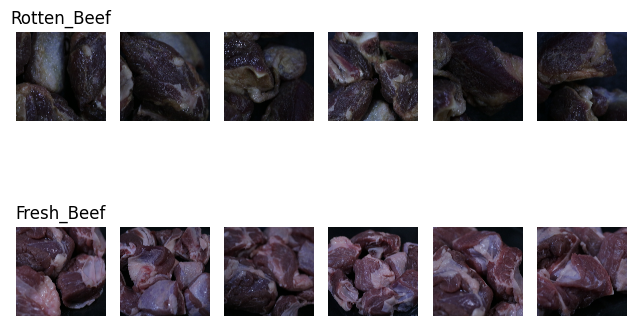

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your dataset directory
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Data Set/Meat_Fresh_and_Rotten_Classification/Beef"

# Define the image file extension as '.JPG'
image_extension = '.JPG'

# Define the number of sample images to visualize per class
num_samples_per_class = 6

# Create a list to store sample image paths
sample_image_paths = []

# Get a list of class folders
class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

# Define the number of columns for subplots
num_columns = num_samples_per_class

# Iterate through class folders
for class_folder in class_folders:
    class_path = os.path.join(dataset_path, class_folder)
    image_files = [file for file in os.listdir(class_path) if file.endswith(image_extension)]

    if not image_files:
        continue  # Skip empty folders

    # Randomly select 6 images for visualization
    sample_images = random.sample(image_files, min(num_samples_per_class, len(image_files)))

    sample_image_paths.extend([os.path.join(class_path, img) for img in sample_images])

# Calculate the number of rows required
num_rows = (len(sample_image_paths) + num_columns - 1) // num_columns

# Visualize sample images with class names
for i, image_path in enumerate(sample_image_paths, start=1):
    plt.subplot(num_rows, num_columns, i)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')

    if i % num_columns == 1:
        plt.title(class_folders[i // num_columns])

plt.tight_layout()
plt.show()


Found 415 images belonging to 2 classes.
Number of classes: 2
Class labels: {'Fresh_Beef': 0, 'Rotten_Beef': 1}
Number of images per class:
Rotten_Beef: 214 images
Fresh_Beef: 201 images


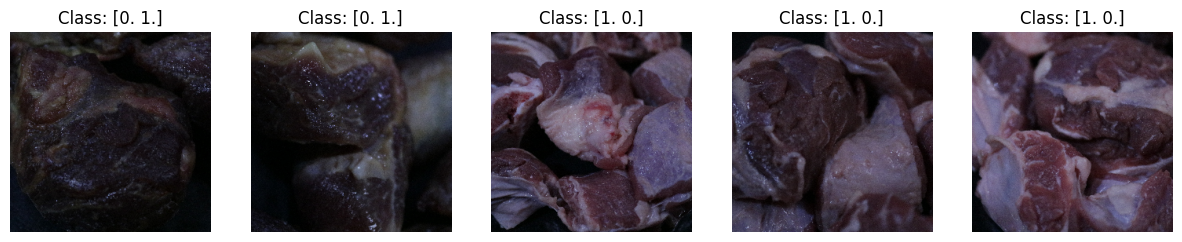

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Replace this path with your dataset path
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Data Set/Meat_Fresh_and_Rotten_Classification/Beef"

# Create an ImageDataGenerator for loading and preprocessing images
image_data_generator = ImageDataGenerator(rescale=1./255)

# Use flow_from_directory to load images from a directory
image_dataset = image_data_generator.flow_from_directory(
    dataset_path,
    target_size=(256, 256),  # Set your desired target size
    batch_size=32,           # Set your desired batch size
    class_mode='categorical'  # Set the class mode based on your dataset
)

# Display some details about the loaded dataset
print("Number of classes:", len(image_dataset.class_indices))
print("Class labels:", image_dataset.class_indices)

# Count the number of images per class
class_image_counts = {class_label: len(os.listdir(os.path.join(dataset_path, class_label)))
                      for class_label in os.listdir(dataset_path)}
print("Number of images per class:")
for class_label, count in class_image_counts.items():
    print(f"{class_label}: {count} images")

# Display a few sample images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    image, label = image_dataset.next()
    axes[i].imshow(image[0])
    axes[i].axis('off')
    axes[i].set_title(f"Class: {label[0]}")

plt.show()


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tqdm import tqdm

# Replace this path with your dataset path
dataset_path = "/content/drive/MyDrive/Meat Data Set/The Data Set/Meat_Fresh_and_Rotten_Classification/Beef"
output_folder = "/content/drive/MyDrive/Split dataset Beef Quality Classification"

# Create output folders for train and test sets
train_folder = os.path.join(output_folder, "train")
test_folder = os.path.join(output_folder, "test")
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Loop through each class folder
for class_name in tqdm(os.listdir(dataset_path), desc="Processing classes"):
    class_path = os.path.join(dataset_path, class_name)

    # Skip non-directory entries
    if not os.path.isdir(class_path):
        continue

    # Get a list of all images in the class folder with .jpg or .JPG extension
    images = [img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))]

    # Print the list of images for each class
    print(f"Class '{class_name}' has {len(images)} image(s): {images}")

    # Check if there are any images for the current class
    if not images:
        print(f"Skipping class '{class_name}' as it has no images.")
        continue

    # Split the images into train and test sets
    train_images, test_images = train_test_split(images, test_size=0.2, random_state=42)

    # Save images to the corresponding train and test folders
    for img in train_images:
        source_path = os.path.join(class_path, img)
        destination_path = os.path.join(train_folder, class_name, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

    for img in test_images:
        source_path = os.path.join(class_path, img)
        destination_path = os.path.join(test_folder, class_name, img)
        os.makedirs(os.path.dirname(destination_path), exist_ok=True)
        shutil.copyfile(source_path, destination_path)

print("Dataset splitting and copying completed.")


Processing classes:   0%|          | 0/2 [00:00<?, ?it/s]

Class 'Rotten_Beef' has 214 image(s): ['IMG_6559.JPG', 'IMG_6558.JPG', 'IMG_6560.JPG', 'IMG_6538.JPG', 'IMG_6553.JPG', 'IMG_6562.JPG', 'IMG_6545.JPG', 'IMG_6557.JPG', 'IMG_6546.JPG', 'IMG_6541.JPG', 'IMG_6555.JPG', 'IMG_6542.JPG', 'IMG_6551.JPG', 'IMG_6561.JPG', 'IMG_6547.JPG', 'IMG_6539.JPG', 'IMG_6556.JPG', 'IMG_6548.JPG', 'IMG_6550.JPG', 'IMG_6552.JPG', 'IMG_6554.JPG', 'IMG_6549.JPG', 'IMG_6543.JPG', 'IMG_6528.JPG', 'IMG_6535.JPG', 'IMG_6515.JPG', 'IMG_6519.JPG', 'IMG_6533.JPG', 'IMG_6521.JPG', 'IMG_6527.JPG', 'IMG_6537.JPG', 'IMG_6518.JPG', 'IMG_6525.JPG', 'IMG_6522.JPG', 'IMG_6544.JPG', 'IMG_6531.JPG', 'IMG_6529.JPG', 'IMG_6516.JPG', 'IMG_6536.JPG', 'IMG_6534.JPG', 'IMG_6517.JPG', 'IMG_6526.JPG', 'IMG_6524.JPG', 'IMG_6532.JPG', 'IMG_6540.JPG', 'IMG_6520.JPG', 'IMG_6523.JPG', 'IMG_6530.JPG', 'IMG_6513.JPG', 'IMG_6494.JPG', 'IMG_6509.JPG', 'IMG_6500.JPG', 'IMG_6495.JPG', 'IMG_6493.JPG', 'IMG_6512.JPG', 'IMG_6488.JPG', 'IMG_6508.JPG', 'IMG_6498.JPG', 'IMG_6499.JPG', 'IMG_6489.JPG', '

Processing classes:  50%|█████     | 1/2 [00:12<00:12, 12.75s/it]

Class 'Fresh_Beef' has 201 image(s): ['IMG_4841.JPG', 'IMG_4835.JPG', 'IMG_4846.JPG', 'IMG_4843.JPG', 'IMG_4844.JPG', 'IMG_4836.JPG', 'IMG_4838.JPG', 'IMG_4834.JPG', 'IMG_4842.JPG', 'IMG_4847.JPG', 'IMG_4845.JPG', 'IMG_4840.JPG', 'IMG_4827.JPG', 'IMG_4823.JPG', 'IMG_4825.JPG', 'IMG_4830.JPG', 'IMG_4826.JPG', 'IMG_4837.JPG', 'IMG_4816.JPG', 'IMG_4819.JPG', 'IMG_4831.JPG', 'IMG_4828.JPG', 'IMG_4821.JPG', 'IMG_4839.JPG', 'IMG_4813.JPG', 'IMG_4832.JPG', 'IMG_4817.JPG', 'IMG_4824.JPG', 'IMG_4818.JPG', 'IMG_4833.JPG', 'IMG_4829.JPG', 'IMG_4815.JPG', 'IMG_4820.JPG', 'IMG_4804.JPG', 'IMG_4798.JPG', 'IMG_4794.JPG', 'IMG_4803.JPG', 'IMG_4806.JPG', 'IMG_4808.JPG', 'IMG_4801.JPG', 'IMG_4811.JPG', 'IMG_4814.JPG', 'IMG_4822.JPG', 'IMG_4799.JPG', 'IMG_4812.JPG', 'IMG_4810.JPG', 'IMG_4809.JPG', 'IMG_4802.JPG', 'IMG_4796.JPG', 'IMG_4797.JPG', 'IMG_4800.JPG', 'IMG_4807.JPG', 'IMG_4805.JPG', 'IMG_4792.JPG', 'IMG_4779.JPG', 'IMG_4775.JPG', 'IMG_4782.JPG', 'IMG_4783.JPG', 'IMG_4777.JPG', 'IMG_4788.JPG', 'I

Processing classes: 100%|██████████| 2/2 [00:40<00:00, 20.11s/it]

Dataset splitting and copying completed.


In [ ]:
import os

# Replace this path with your split dataset path
split_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification"

# Dictionary to store the number of images per class
class_image_count = {}

# Loop through each class folder in the train set
for class_name in os.listdir(os.path.join(split_dataset_path, "train")):
    class_path = os.path.join(split_dataset_path, "train", class_name)

    # Count the number of images in the class folder
    image_count = len([img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))])

    # Update the count of images for the current class
    class_image_count[class_name] = image_count

# Display the diagnostic report for the train set
print("\nDiagnostic Report for Train Set:")
for class_name, image_count in class_image_count.items():
    print(f"Class '{class_name}' has {image_count} image(s).")

# Reset the dictionary for the test set
class_image_count = {}

# Loop through each class folder in the test set
for class_name in os.listdir(os.path.join(split_dataset_path, "test")):
    class_path = os.path.join(split_dataset_path, "test", class_name)

    # Count the number of images in the class folder
    image_count = len([img for img in os.listdir(class_path) if img.lower().endswith((".jpg", ".jpeg"))])

    # Update the count of images for the current class
    class_image_count[class_name] = image_count

# Display the diagnostic report for the test set
print("\nDiagnostic Report for Test Set:")
for class_name, image_count in class_image_count.items():
    print(f"Class '{class_name}' has {image_count} image(s).")



Diagnostic Report for Train Set:
Class 'Rotten_Beef' has 171 image(s).
Class 'Fresh_Beef' has 160 image(s).

Diagnostic Report for Test Set:
Class 'Rotten_Beef' has 43 image(s).
Class 'Fresh_Beef' has 41 image(s).


Model Training

#Beef Quality Classification using DNN

Class: Rotten_Beef, Number of images: 171
Class: Fresh_Beef, Number of images: 160
Class: Rotten_Beef, Number of images: 43
Class: Fresh_Beef, Number of images: 41
Epoch 1/100
10/10 [==============================] - 10s 466ms/step - loss: 0.6687 - accuracy: 0.5518 - val_loss: 0.4434 - val_accuracy: 0.9762
Epoch 2/100
10/10 [==============================] - 6s 592ms/step - loss: 0.4415 - accuracy: 0.9164 - val_loss: 0.0676 - val_accuracy: 0.9881
Epoch 3/100
10/10 [==============================] - 4s 420ms/step - loss: 0.2324 - accuracy: 0.9900 - val_loss: 7.2182 - val_accuracy: 0.9286
Epoch 4/100
10/10 [==============================] - 6s 569ms/step - loss: 0.1393 - accuracy: 0.9799 - val_loss: 21.2033 - val_accuracy: 0.8690
Epoch 5/100
10/10 [==============================] - 4s 423ms/step - loss: 0.0797 - accuracy: 0.9866 - val_loss: 9.7389 - val_accuracy: 0.9524
Epoch 6/100
10/10 [==============================] - 6s 609ms/step - loss: 0.0521 - accuracy: 0.9933 - val_loss: 45.924

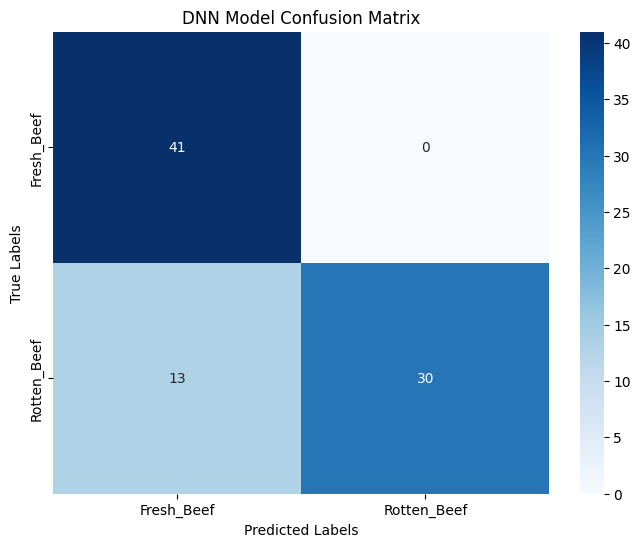

DNN Model Classification Report:
              precision    recall  f1-score   support

  Fresh_Beef       0.76      1.00      0.86        41
 Rotten_Beef       1.00      0.70      0.82        43

    accuracy                           0.85        84
   macro avg       0.88      0.85      0.84        84
weighted avg       0.88      0.85      0.84        84

DNN Evaluation metrics saved at: /content/drive/MyDrive/Trained model/Beef Quality Classification/DNN/Iteration 2 DNN/evaluation_metrics.txt


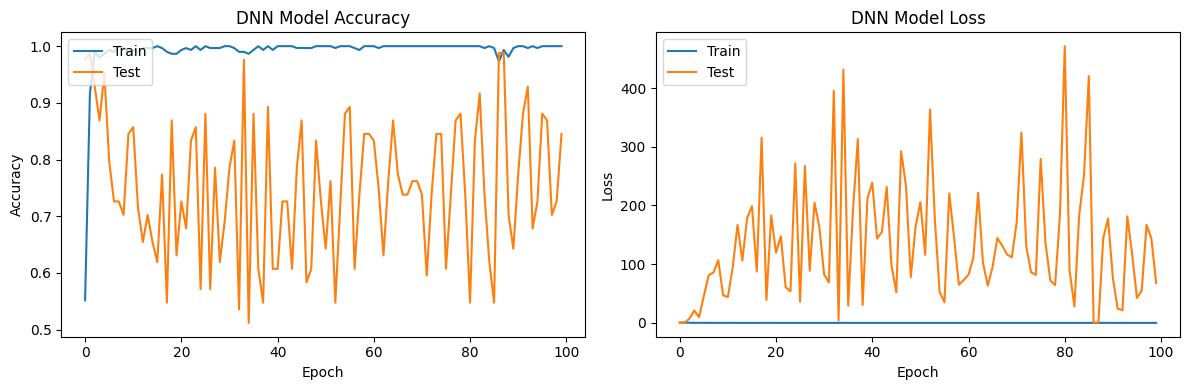

DNN Model saved at: /content/drive/MyDrive/Trained model/Beef Quality Classification/DNN/Iteration 2 DNN


In [5]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    # Convert labels to one-hot encoding
    labels_one_hot = to_categorical(labels_encoded)

    return data, labels_one_hot, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/test"

train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path)
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path)

# Data augmentation using ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1./255  # Normalize pixel values
)

# Create a data generator for the training set
train_generator = datagen.flow(train_data, train_labels, batch_size=32, shuffle=True)

# Get the number of classes based on the unique labels in the training set
num_classes = len(np.unique(label_encoder.inverse_transform(np.argmax(train_labels, axis=1))))

# Define the DNN model
dnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(num_classes, activation='softmax')
])

# Compile the model
dnn_model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the DNN model
dnn_history = dnn_model.fit(
    train_generator,
    steps_per_epoch=len(train_data) // 32,
    epochs=100,
    validation_data=(test_data, test_labels)
)

# Evaluate the DNN model on the test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(test_data, test_labels)
print(f'DNN Test Accuracy: {dnn_test_acc}')

# Make predictions on the test set using the DNN model
dnn_predictions = dnn_model.predict(test_data)
dnn_predicted_labels = np.argmax(dnn_predictions, axis=1)
dnn_true_labels = np.argmax(test_labels, axis=1)

# Calculate confusion matrix for DNN model
dnn_conf_matrix = confusion_matrix(dnn_true_labels, dnn_predicted_labels)

# Plot confusion matrix for DNN model
plt.figure(figsize=(8, 6))
sns.heatmap(dnn_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('DNN Model Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Save the confusion matrix plot for DNN model
dnn_model_save_path = "/content/drive/MyDrive/Trained model/Beef Quality Classification/DNN/Iteration 2 DNN"
# Create directories if they don't exist
os.makedirs(dnn_model_save_path, exist_ok=True)

dnn_conf_matrix_plot_path = os.path.join(dnn_model_save_path, "confusion_matrix_plot.png")
plt.savefig(dnn_conf_matrix_plot_path, dpi=300, bbox_inches='tight')

plt.show()

# Calculate precision, recall, and F1-score for DNN model
dnn_report = classification_report(dnn_true_labels, dnn_predicted_labels, target_names=label_encoder.classes_)
print("DNN Model Classification Report:")
print(dnn_report)

# Save evaluation metrics to a .txt file for DNN model
dnn_evaluation_file_path = os.path.join(dnn_model_save_path, "evaluation_metrics.txt")

# Ensure the directory exists before attempting to save the file
os.makedirs(os.path.dirname(dnn_evaluation_file_path), exist_ok=True)

with open(dnn_evaluation_file_path, "w") as file:
    file.write(f'DNN Test Accuracy: {dnn_test_acc}\n\n')
    file.write("DNN Confusion Matrix:\n")
    file.write(str(dnn_conf_matrix) + "\n\n")
    file.write("DNN Classification Report:\n")
    file.write(dnn_report + "\n\n")

print(f'DNN Evaluation metrics saved at: {dnn_evaluation_file_path}')

# Plot training history for DNN
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(dnn_history.history['accuracy'])
plt.plot(dnn_history.history['val_accuracy'])
plt.title('DNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(dnn_history.history['loss'])
plt.plot(dnn_history.history['val_loss'])
plt.title('DNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()

# Save the accuracy plot for DNN
dnn_accuracy_plot_path = os.path.join(dnn_model_save_path, "accuracy_plot.png")
plt.savefig(dnn_accuracy_plot_path, dpi=300, bbox_inches='tight')

plt.show()

# Save the DNN model
dnn_model.save(dnn_model_save_path)

print(f'DNN Model saved at: {dnn_model_save_path}')


#Beef Quality Classification using KNN

Class: Rotten_Beef, Number of images: 171
Class: Fresh_Beef, Number of images: 160
Class: Rotten_Beef, Number of images: 43
Class: Fresh_Beef, Number of images: 41
KNN Test Accuracy: 0.9642857142857143
Confusion Matrix:
[[41  0]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

  Fresh_Beef       0.93      1.00      0.96        41
 Rotten_Beef       1.00      0.93      0.96        43

    accuracy                           0.96        84
   macro avg       0.97      0.97      0.96        84
weighted avg       0.97      0.96      0.96        84

KNN Evaluation metrics saved at: /content/drive/MyDrive/Trained model/Egg Species Classification/KNN/Iteration 1 KNN/evaluation_metrics.txt


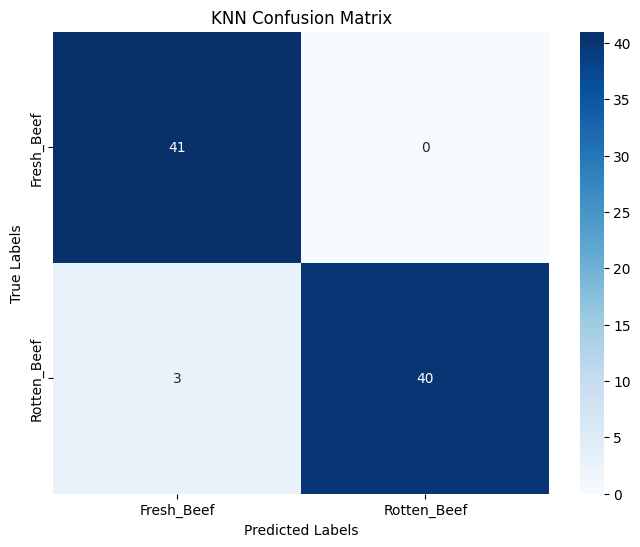

In [6]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib  # Import joblib for model saving
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load and preprocess the dataset
def load_and_preprocess_dataset(dataset_path, image_extensions=('.jpg', '.JPG'), image_size=(256, 256)):
    data = []
    labels = []

    class_folders = [folder for folder in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, folder))]

    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(dataset_path, class_folder)
        image_files = [file for file in os.listdir(class_path) if file.lower().endswith(image_extensions)]

        # Print the number of images loaded for each class
        print(f"Class: {class_folder}, Number of images: {len(image_files)}")

        for image_file in image_files:
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
            img = cv2.resize(img, image_size)  # Resize the image to your desired size
            data.append(img)
            labels.append(class_folder)

    data = np.array(data)
    labels = np.array(labels)

    # Flatten the images for KNN input
    data_flatten = data.reshape((data.shape[0], -1))

    # Encode class labels
    label_encoder = LabelEncoder()
    labels_encoded = label_encoder.fit_transform(labels)

    return data_flatten, labels_encoded, label_encoder

# Load and preprocess the dataset
train_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/train"
test_dataset_path = "/content/drive/MyDrive/Split dataset Beef Quality Classification/test"

# Ensure that train_data and train_labels have non-zero sizes
train_data, train_labels, label_encoder = load_and_preprocess_dataset(train_dataset_path)
if len(train_data) == 0 or len(train_labels) == 0:
    raise ValueError("Error: The size of train_data or train_labels is zero.")

test_data, test_labels, _ = load_and_preprocess_dataset(test_dataset_path)

# Initialize the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=3)  # You can experiment with different values of n_neighbors

# Train the KNN model
knn_model.fit(train_data, train_labels)

# Save the KNN model to a file using joblib
knn_model_save_path = "/content/drive/MyDrive/Trained model/Egg Species Classification/KNN/Iteration 1 KNN"
os.makedirs(knn_model_save_path, exist_ok=True)

joblib.dump(knn_model, os.path.join(knn_model_save_path, "knn_model.joblib"))

# Make predictions on the test set
knn_predictions = knn_model.predict(test_data)

# Evaluate the KNN model on the test set
accuracy = accuracy_score(test_labels, knn_predictions)
conf_matrix = confusion_matrix(test_labels, knn_predictions)
report = classification_report(test_labels, knn_predictions, target_names=label_encoder.classes_)

# Print the evaluation metrics
print(f'KNN Test Accuracy: {accuracy}')
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

# Save evaluation metrics to a .txt file
knn_evaluation_file_path = os.path.join(knn_model_save_path, "evaluation_metrics.txt")

with open(knn_evaluation_file_path, "w") as file:
    file.write(f'KNN Test Accuracy: {accuracy}\n\n')
    file.write("KNN Confusion Matrix:\n")
    file.write(str(conf_matrix) + "\n\n")
    file.write("KNN Classification Report:\n")
    file.write(report + "\n\n")

print(f'KNN Evaluation metrics saved at: {knn_evaluation_file_path}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
